In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("Diwali Sales Data.csv",encoding="unicode_escape") 
df.shape

(11251, 15)

In [3]:
df.drop(columns=["Status","unnamed1"],inplace=True)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [5]:
df.isnull()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
df.dropna(axis=0,how="any",inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [17]:
result1=df.groupby("Gender")["Gender"].count()
result1

Gender
F    7832
M    3407
Name: Gender, dtype: int64

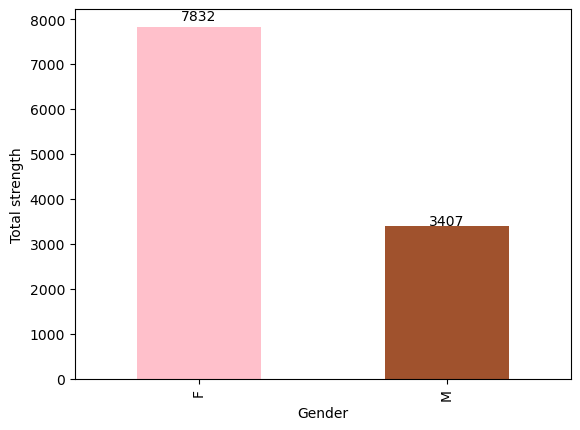

In [18]:
output1=result1.plot(kind="bar",color=["pink","sienna"])
for a in output1.patches:
    plt.annotate(a.get_height(),xy=(a.get_x()+a.get_width()/2,a.get_height()*1.03),ha="center",va="center")
plt.ylabel("Total strength")
plt.show()


In [12]:
result2=df.groupby("Gender")["Amount"].sum().sort_values(ascending=False,inplace=False).reset_index(drop=False,inplace=False)
result2

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


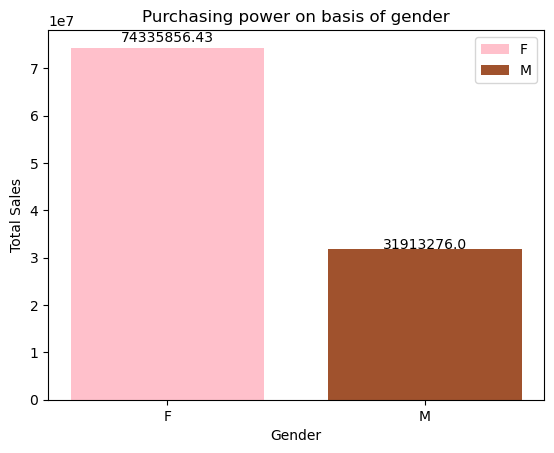

In [16]:

a=plt.bar(result2["Gender"],result2["Amount"],label=result2["Gender"],color=["pink","sienna"],width=0.75)
for k in a.patches:
    plt.annotate(k.get_height(),xy=(k.get_x()+k.get_width()/2,k.get_height()*1.027),ha="center",va="center")
            
plt.xlabel("Gender")
plt.ylabel("Total Sales")
plt.title("Purchasing power on basis of gender")
plt.legend(loc="best")
plt.show()

In [19]:
result3=df.groupby("Age Group")["Amount"].sum().reset_index(drop=False,inplace=False)
result3

,Age Group,Amount
0,0-17,2699653.00
1,18-25,17240732.00
2,26-35,42613443.94
3,36-45,22144995.49
4,46-50,9207844.00
5,51-55,8261477.00
6,55+,4080987.00


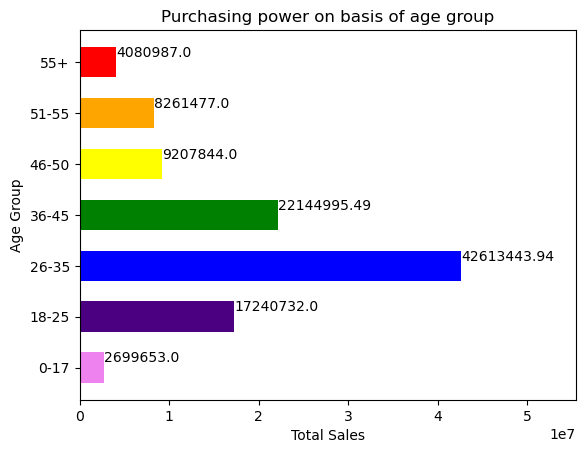

In [21]:
colours=["Violet","indigo","blue","green","yellow","orange","red"]
a=plt.barh(result3["Age Group"],result3["Amount"],color=colours,height=0.6)
for k in a.patches:
        plt.annotate(k.get_width(),xy=(k.get_width(),k.get_y()+k.get_height()*1.04),ha="left",va="top")
    
plt.xlabel("Total Sales")
plt.ylabel("Age Group")
plt.title("Purchasing power on basis of age group")
plt.xlim(0,max(result3["Amount"]*1.3))
plt.show()

In [22]:
result4=df.groupby("State")["Orders"].count().reset_index(drop=False,inplace=False).sort_values(["Orders"],ascending=False,inplace=False)
result4

,State,Orders
14,Uttar Pradesh,1944
10,Maharashtra,1525
7,Karnataka,1304
2,Delhi,1104
9,Madhya Pradesh,921
0,Andhra Pradesh,811
5,Himachal Pradesh,608
8,Kerala,453
4,Haryana,452
1,Bihar,434


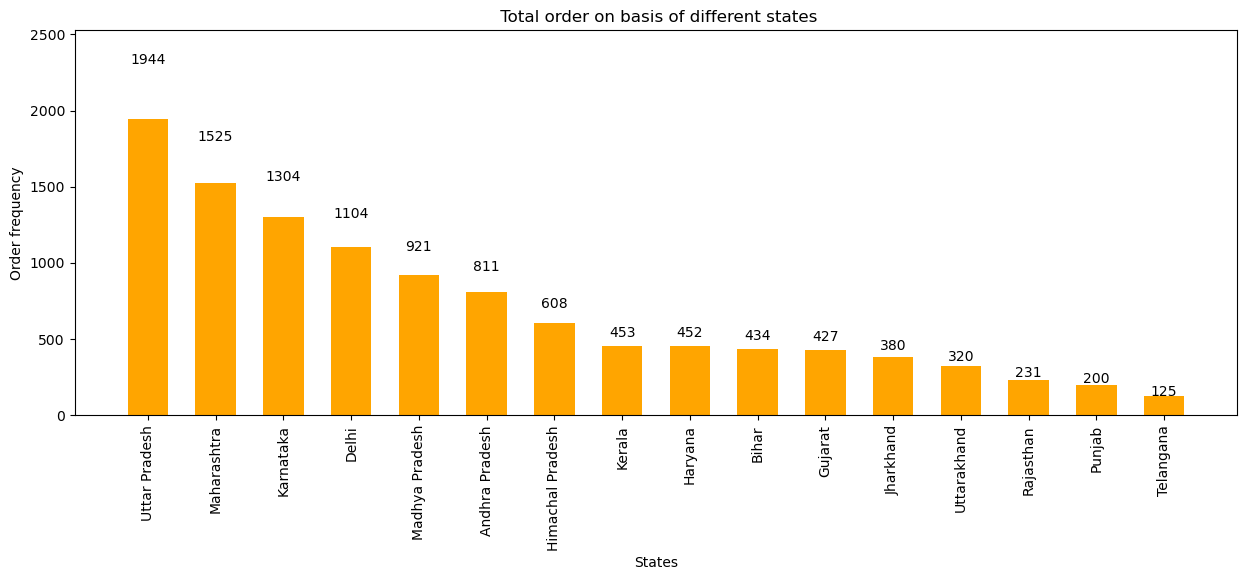

In [23]:
plt.figure(figsize=(15,5))
a=plt.bar(result4["State"],result4["Orders"],color="orange",width=0.6)
for k in a.patches:
        plt.annotate(k.get_height(),xy=(k.get_x()+k.get_width()/2,k.get_height()*1.2),ha="center",va="center")
plt.xlabel("States")
plt.ylabel("Order frequency")
plt.xticks(rotation="vertical")
plt.title(" Total order on basis of different states")
plt.ylim(0,max(result4["Orders"])*1.3)
plt.show()

In [24]:
result5=df.groupby(["Gender","Marital_Status"])["Amount"].sum().sort_values(ascending=True,inplace=False).reset_index(drop=False,inplace=False)
result5

,Gender,Marital_Status,Amount
0,M,1,13574538.00
1,M,0,18338738.00
2,F,1,30549207.99
3,F,0,43786648.44


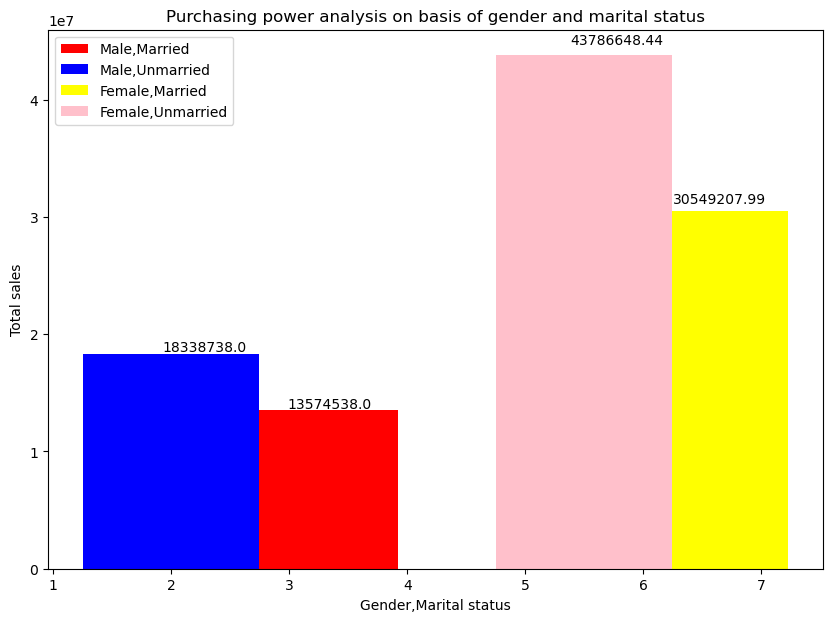

In [25]:
plt.figure(figsize=(10,7))
for i in range(df.shape[0]):
    a=plt.bar(int(result5.shape[0])-1,result5["Amount"][i],label=["Male,Married"],color="red",width=1.85)
    b=plt.bar(int(result5.shape[0])-2,result5["Amount"][i+1],label=["Male,Unmarried"],color="blue",width=1.49)
    c=plt.bar(int(result5.shape[0])+2.3,result5["Amount"][i+2],label=["Female,Married"],color="Yellow",width=1.85)
    d=plt.bar(int(result5.shape[0])+1.5,result5["Amount"][i+3],label=["Female,Unmarried"],color="pink",width=1.49)
    break
for j in [a,b,c,d]:
    for k in j.patches:
        plt.annotate(k.get_height(),xy=(k.get_x()+k.get_width()/1.457,k.get_height()*1.03),ha="center",va="center")

plt.xlabel("Gender,Marital status")
plt.ylabel("Total sales")
plt.legend(loc="best")
plt.title("Purchasing power analysis on basis of gender and marital status")
plt.show()

In [26]:
result6=df.groupby("Occupation")["Amount"].sum().reset_index(drop=False,inplace=False)
result6

,Occupation,Amount
0,Agriculture,2593087.00
1,Automobile,5368596.00
2,Aviation,12602298.00
3,Banking,10770610.95
4,Chemical,5297436.00
5,Construction,3597511.00
6,Food Processing,4070670.00
7,Govt,8517212.00
8,Healthcare,13034587.49
9,Hospitality,6376405.00


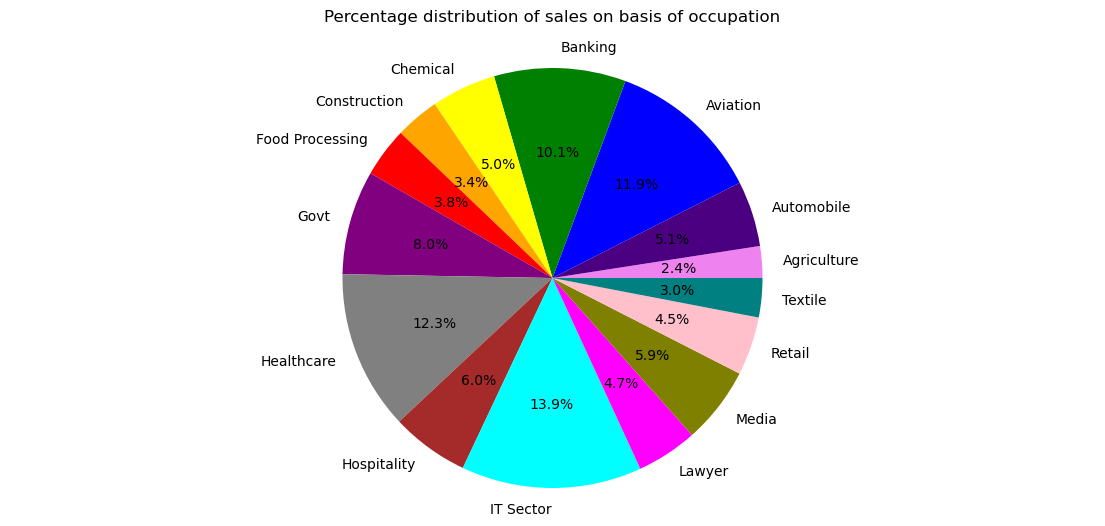

In [27]:
plt.figure(figsize=(14,6))
colours=["violet","indigo","blue","green","yellow","orange","red","purple","grey","brown","cyan","magenta","olive","pink","teal"]
plt.pie(result6["Amount"],labels=result6["Occupation"],colors=colours,autopct="%0.1f%%",shadow=False)
plt.title("Percentage distribution of sales on basis of occupation\n")
plt.axis("equal")
plt.show()

In [28]:
result7=df.groupby("Product_Category")["Orders"].count().reset_index(drop=False,inplace=False)
result7

,Product_Category,Orders
0,Auto,97
1,Beauty,422
2,Books,103
3,Clothing & Apparel,2655
4,Decor,96
5,Electronics & Gadgets,2087
6,Food,2490
7,Footwear & Shoes,1059
8,Furniture,352
9,Games & Toys,386


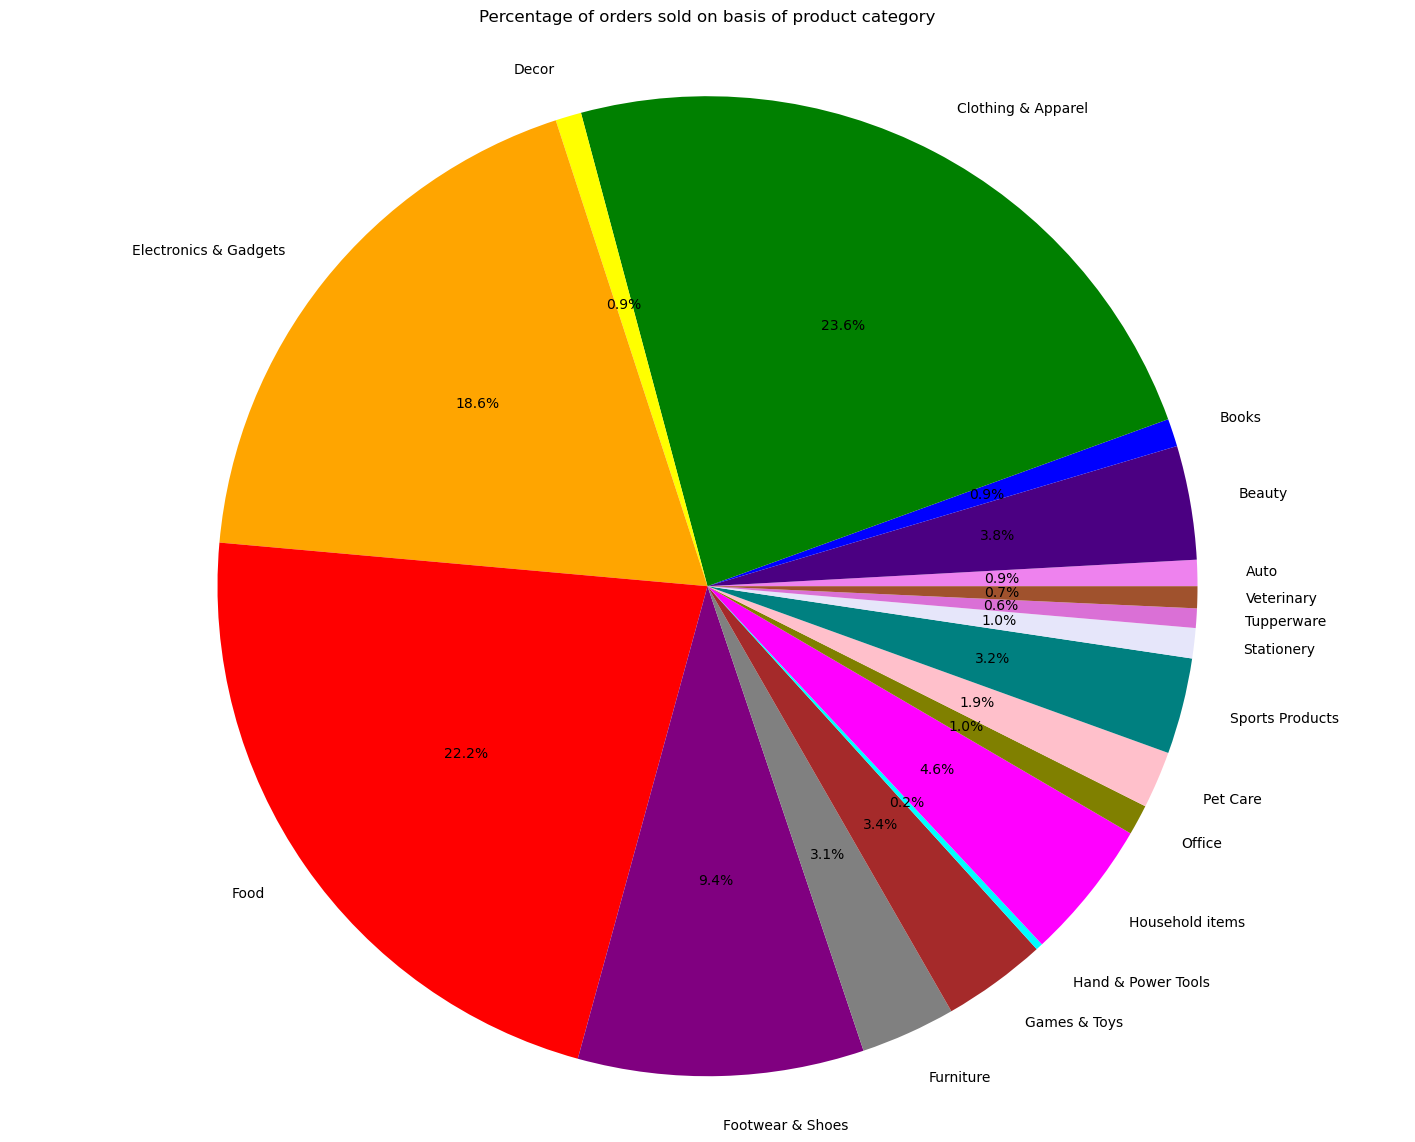

In [31]:
plt.figure(figsize=(18,14))
colours=["violet","indigo","blue","green","yellow","orange","red","purple","grey","brown","cyan","magenta","olive","pink","teal","lavender","orchid","sienna"]
plt.pie(result7["Orders"],labels=result7["Product_Category"],colors=colours,autopct="%0.1f%%",shadow=False)
plt.title("Percentage of orders sold on basis of product category\n")
plt.axis("equal")
plt.show()